#Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Reading the csv into python environment

In [59]:
data=pd.read_csv("train_loan.csv")

In [60]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Pre-Processing

#Missing Values

In [62]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [63]:
# Missing values in percentage
data.isnull().sum()/(len(data))*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [64]:
# we will fill it with mode since categorical
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [65]:
# we will fill it with mode since categorical
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [66]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [67]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [68]:
#will use median since numerical and need an existing value
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [69]:
#will use mean
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [70]:
#will use mode as there are only 2 values in the column and impute using the most frequent one
data['Credit_History']  = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [71]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [72]:
#Imputed all the missing values

In [73]:
#COnvert ApplicantIncome to float
data['ApplicantIncome'] = pd.to_numeric(data['ApplicantIncome'],errors="coerce").astype(float)

#Outlier Detection

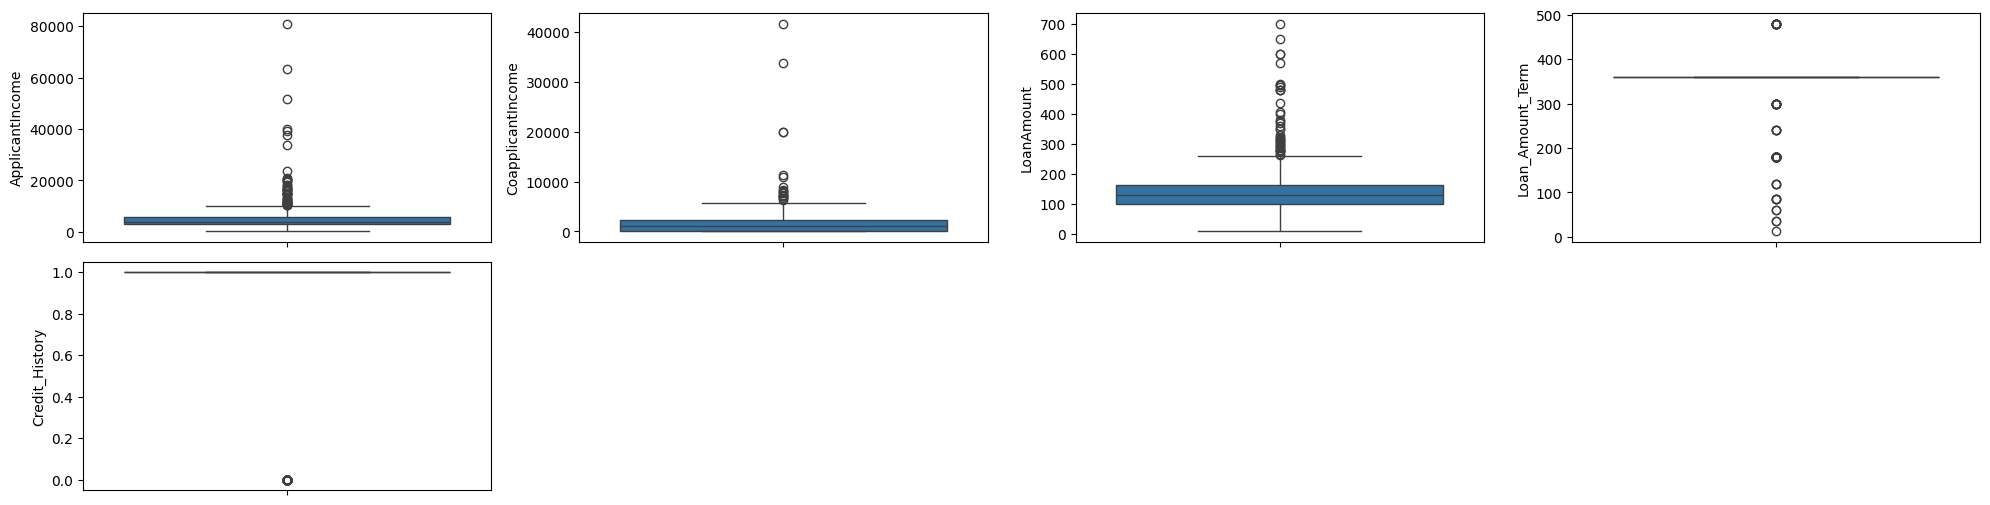

In [74]:
#using boxplot
df_numerical = data.select_dtypes(exclude='object')
x=1
plt.figure(figsize = (20, 15))
for col in df_numerical.columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[col])
    x+=1
plt.tight_layout()

There are Outliers in the dataset

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [76]:
data['Loan_Status'].unique()


array(['Y', 'N'], dtype=object)

In [77]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

#Encoding

In [78]:
#Label Encoding as there are only 2 unique values in these columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Education'] = le.fit_transform(data['Education'])
data['Married'] = le.fit_transform(data['Married'])
data['Gender'] = le.fit_transform(data['Gender'])

In [79]:
#One HOT Encoding
data = pd.get_dummies(data, columns=['Property_Area'], drop_first=True)

In [80]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

#Scaling

In [81]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,1,False,True
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,False,False
2,LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,1,False,True
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,1,False,True
4,LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,1,False,True


In [82]:
#MinMax Scaling
data['Normalized_ApplicantIncome']=(data['ApplicantIncome']-data['ApplicantIncome'].min())/(data['ApplicantIncome'].max()-data['ApplicantIncome'].min())
data['Normalized_CoapplicantIncome']=(data['CoapplicantIncome']-data['CoapplicantIncome'].min())/(data['CoapplicantIncome'].max()-data['CoapplicantIncome'].min())
data['Normalized_LoanAmount']=(data['LoanAmount']-data['LoanAmount'].min())/(data['LoanAmount'].max()-data['LoanAmount'].min())

In [83]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Normalized_ApplicantIncome,Normalized_CoapplicantIncome,Normalized_LoanAmount
0,LP001002,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,1,False,True,0.070489,0.000000,0.198860
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,False,False,0.054830,0.036192,0.172214
2,LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,1,False,True,0.035250,0.000000,0.082489
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,1,False,True,0.030093,0.056592,0.160637
4,LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,1,False,True,0.072356,0.000000,0.191027
